## ****(a) Generated a random instance of the frozen lake scenario given two inputs - the size of the lake (N)=4 assuming its square, and the number of holes (M)=4****

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def generate_Reward_table(n,m):
    #n=4
    #m=4
    R=np.zeros((n,n))
    #print(R)
    i=np.random.choice(n, m,replace=False)
    j=np.random.choice(n, m,replace=False)
    #print(i,j)

    for k in range(len(i)):
        i1=i[k]
        i2=j[k]
        R[i1][i2]=-100

    R[n-1][n-1]=100
    R[0][0]=0
    #print(R)
    F_R=R.flatten()
    #print(F_R)
    q_learning_table = np.zeros([n*n+1,4])
    return R,F_R,q_learning_table
    


[[   0.    0. -100.    0.]
 [   0.    0.    0. -100.]
 [-100.    0.    0.    0.]
 [   0. -100.    0.  100.]]


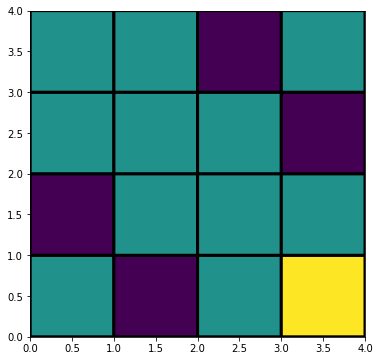

In [3]:
R,F_R,q_learning_table=generate_Reward_table(4,4)
print(R)
plt.figure(figsize=(6,6))
plt.pcolor(R[::-1],edgecolors='k', linewidths=3)
plt.show()

## ****Function to define available action****

In [4]:
def available_action(curr,n):
    moves=[]
    if (curr%n)!=1:
        #moves.append(curr-1)
        moves.append(0)
    if (curr%n)!=0:
        #moves.append(curr+1)
        moves.append(1)
    if curr-n>0:
        #moves.append(curr-n)
        moves.append(2)
    if curr+n<=(n**2):
        #moves.append(curr+n)
        moves.append(3)
    return moves   


## Calculate Next State and reward

In [5]:
def next_state_and_reward(curr_state,action,F_R):
    #print("inside next state",curr_state,action)
    if action==0:
        next_st=curr_state-1
    if action==1:
        next_st=curr_state+1
    if action==2:
        next_st=curr_state-n
    if action==3:
        next_st=curr_state+n
    
    reward=F_R[next_st-1]
    #print(i,j,reward)
    return next_st,reward
        

## Get Sample Action


In [6]:
def sample_next_action(available_state_range):
    next_action=int(np.random.choice(available_state_range,1))
    return next_action

## **b)   Qlearning Function**

In [7]:
def QLearning(n,F_R,gamma,alpha,epsilon,q_learning_table,ran):
    state=1
    rlist = []

    for i in range(ran):
        rAll=0
        state=1
        while state <n*n:
            a=0
            available_act=available_action(state,n)
            if random.uniform(0,1) > epsilon:
                max_v=0
                for x in available_act:
                    #print(x)
                    if q_learning_table[state][x] >=max_v:
                        max_v=q_learning_table[state][x] 
                        a=x
            else:
                a=sample_next_action(available_act)


            next_st,reward=next_state_and_reward(state,a,F_R)
            q_learning_table[state,a] = (1-alpha)*q_learning_table[state,a] + (alpha * (reward + gamma*np.max(q_learning_table[next_st,:])))
            state=next_st
            rAll += reward
            #print(state)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*i)
#         if i%200 == 0:
#             print('Trial {0}; reward : {1}'.format(i, rAll))
        rlist.append(rAll)
    #print(q_learning_table)
    return q_learning_table,rlist



## Plotting Reward with respect to episode for different parameter
we Can see below the effect of changing alpha value and gamma.aplpha value represent learing rate so small alpha it will take more time to converge.
Gamma is the value of future reward. If it is equal to one, the agent values future reward  as current reward. when it is reduced it will give discount to the future reward.

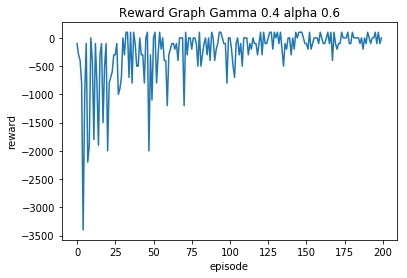

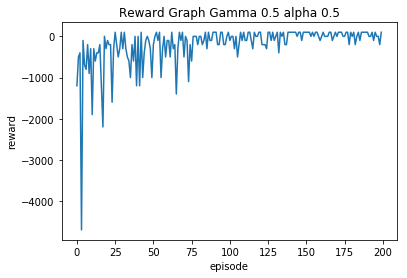

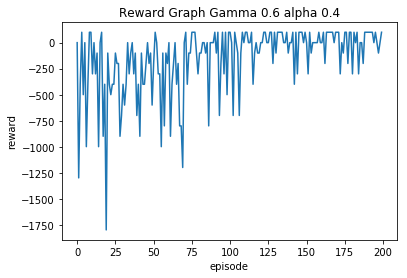

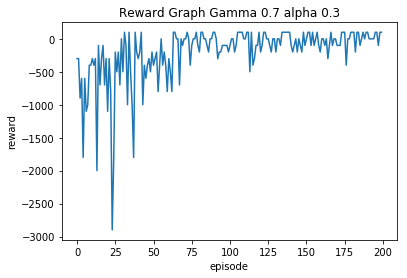

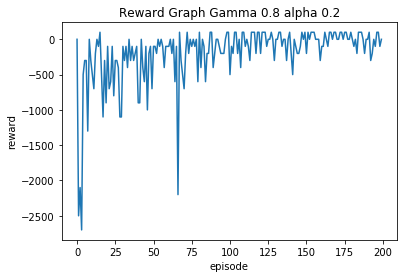

In [8]:
gamma_l=[0.4,0.5,0.6,0.7,0.8]
alpha_l=[0.6,0.5,0.4,0.3,0.2]
epsilon = 1.0
decay_rate = 0.005
max_epsilon=1.0
min_epsilon=0.01
x_axis=range(200)
n=4
ran=200
for i in range(5):
    gamma=gamma_l[i]
    alpha=alpha_l[i]
    q_learning_table,rlist=QLearning(n,F_R,gamma,alpha,epsilon,q_learning_table,ran)
    plt.plot(x_axis, rlist, label = "r list") 
    plt.xlabel('episode') 
    plt.ylabel('reward') 
    plt.title('Reward Graph Gamma '+str(gamma)+ " alpha "+str(alpha))
    plt.show()
#rlist

In [9]:

def calculate_step(n,F_R,q_learning_table):
    #for episode in range(5):
    state=1
    step=0
    while state <n*n:
            available_act=available_action(state,n)
            max_v=0
            for x in available_act:
                if q_learning_table[state][x] >=max_v:
                    max_v=q_learning_table[state][x] 
                    a=x
            next_st,reward=next_state_and_reward(state,a,F_R)
            #print(next_st)
            step+=1
            state = next_st
        #print("Steps",step)
    return step

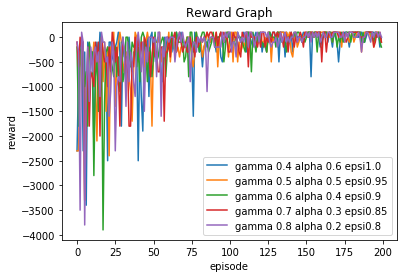

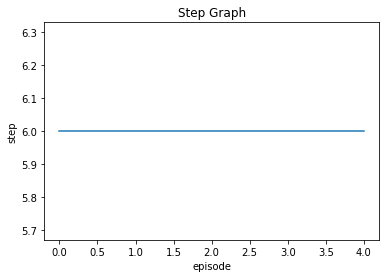

In [10]:
step_l=[]
epsilon_l=[1.0,0.95,0.9,0.85,0.8]
x_axis1=range(200)
ran=200
for i in range(5):
    gamma=gamma_l[i]
    alpha=alpha_l[i]
    epsilon=epsilon_l[i]
    q_learning_table,rlist=QLearning(n,F_R,gamma,alpha,epsilon,q_learning_table,ran)
    step=calculate_step(n,F_R,q_learning_table)
    step_l.append(step)
    plt.plot(x_axis1, rlist, label = "gamma "+ str(gamma)+ " alpha "+str(alpha) +" epsi"+str(epsilon))
    plt.xlabel('episode') 
    plt.ylabel('reward') 
    plt.title('Reward Graph')
plt.legend()
plt.show()
x_axis=range(5)
plt.plot(x_axis, step_l, label = "step") 
plt.xlabel('episode') 
plt.ylabel('step') 
plt.title('Step Graph')
plt.show()

    

# # Plotting Reward for different value of n
we can see the effect of differnt n and m in below graph

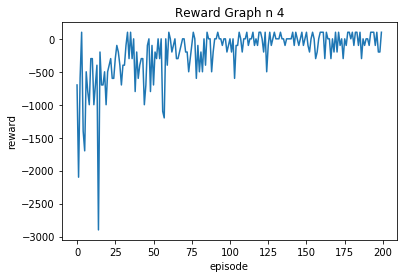

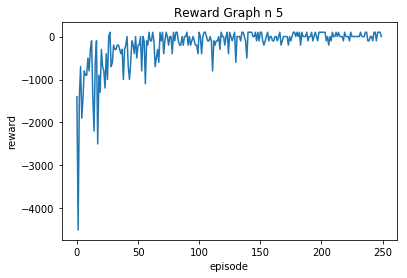

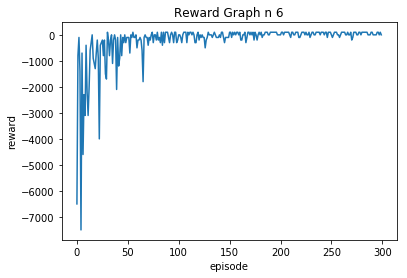

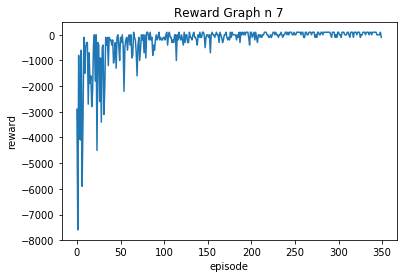

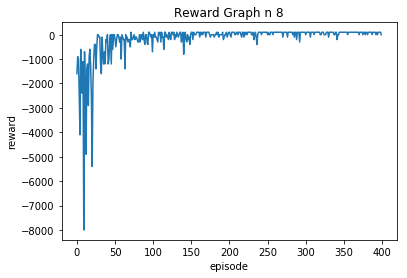

In [11]:
gamma=0.5
alpha=0.5
epsilon = 1.0
decay_rate = 0.005
max_epsilon=1.0
min_epsilon=0.01
for n in range(4,9):
    R,F_R,q_learning_table=generate_Reward_table(n,n)
#     print(R)
#     plt.figure(figsize=(6,6))
#     plt.pcolor(R[::-1],edgecolors='k', linewidths=3)
#     plt.show()
    ran=n*50
    x_axis=range(n*50)
    q_learning_table,rlist=QLearning(n,F_R,gamma,alpha,epsilon,q_learning_table,ran)
    plt.plot(x_axis, rlist, label = "r list") 
    plt.xlabel('episode') 
    plt.ylabel('reward') 
    plt.title('Reward Graph n '+str(n))
    plt.show()
    
        
    